C:\Users\oberm\AppData\Local\Temp\ipykernel_46388\518462376.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_collisions_details_datasd.csv')
C:\Users\oberm\AppData\Local\Temp\ipykernel_46388\518462376.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_collisions_details_datasd.csv')
C:\Users\oberm\AppData\Local\Temp\ipykernel_46388\518462376.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casualty_total'] = df['injured'] + df['killed']


Mean Normalized Rate: 0.71
Standard Deviation of Normalized Rate: 0.24


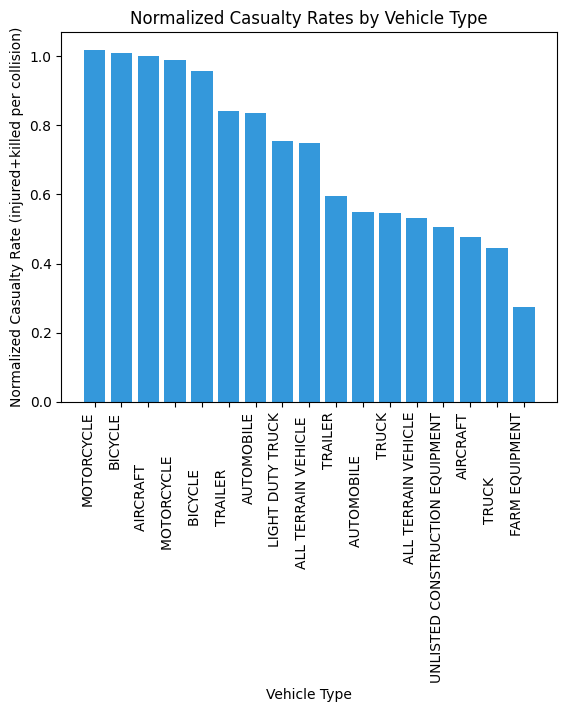

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('pd_collisions_details_datasd.csv')

# Dropping rows with veh type entry
df = pd.read_csv('pd_collisions_details_datasd.csv')

# Dropping rows with veh type entry
df = df.dropna(subset = ['veh_type'])

df['casualty_total'] = df['injured'] + df['killed']
grouped_data = df.groupby('veh_type').agg({'casualty_total': 'sum', 'veh_type': 'count'})

grouped_data['normalized_rate'] = grouped_data['casualty_total'] / grouped_data['veh_type']
grouped_data = grouped_data.sort_values(by='normalized_rate', ascending=False)

# Display mean and standard deviation
mean_normalized_rate = grouped_data['normalized_rate'].mean()
std_normalized_rate = grouped_data['normalized_rate'].std()

print(f"Mean Normalized Rate: {mean_normalized_rate:.2f}")
print(f"Standard Deviation of Normalized Rate: {std_normalized_rate:.2f}")

bar_color = '#3498db'
fig, ax = plt.subplots()
ax.set_facecolor('white')
plt.bar(grouped_data.index, grouped_data['normalized_rate'], color = bar_color)
plt.xlabel('Vehicle Type')
plt.ylabel('Normalized Casualty Rate (injured+killed per collision)')
plt.title('Normalized Casualty Rates by Vehicle Type')
plt.xticks(rotation=90, ha='right')plt.show()

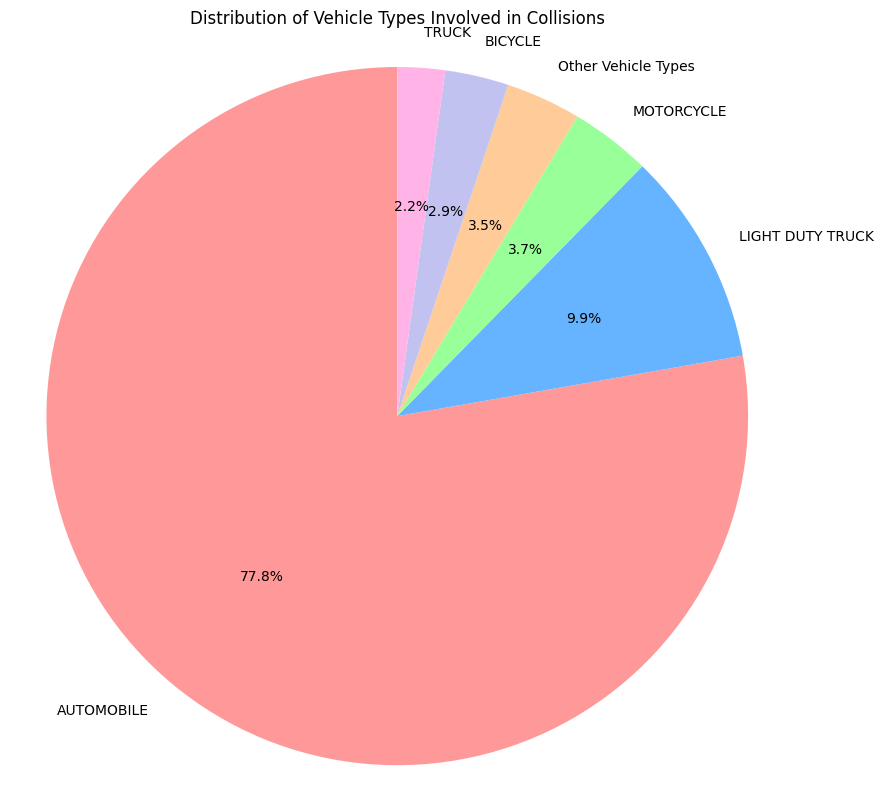

In [52]:
# Count the occurrences of each vehicle type
vehicle_counts = df['veh_type'].value_counts()

# Identify categories with less than 2 percent and group them into 'Other'
threshold = 0.02  # Threshold for grouping categories
small_categories = vehicle_counts[vehicle_counts / vehicle_counts.sum() < threshold].index

# Use .loc to replace values in the 'veh_type' column
df.loc[df['veh_type'].isin(small_categories), 'veh_type'] = 'Other Vehicle Types'

# Recalculate the counts after grouping small categories
vehicle_counts = df['veh_type'].value_counts()


fig, ax = plt.subplots(figsize=(10, 10))

# Set the plot background color to white
fig.patch.set_facecolor('white')

# Define softened colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

ax.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black'}, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax.set_title('Distribution of Vehicle Types Involved in Collisions', color='black')
plt.show()